<h1 style='text-align: center;'>DATA EXPLORATION</h1>

### Import the Libraries

In [1]:
import pandas as pd
import pandas
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler



### Load the Data

In [2]:
FILE_NAME = "data/UTI DATASET-LABELED.xlsx"
df = pd.read_excel(FILE_NAME)
display(df)

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.6,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.015,1-2,0-1,RARE,FEW,NONE SEEN,RARE,NEGATIVE
1433,42.0,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.5,1.010,0-2,0-2,RARE,NONE SEEN,NONE SEEN,RARE,NEGATIVE
1434,47.0,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,6.0,1.030,2-4,0-2,MODERATE,MODERATE,NONE SEEN,RARE,NEGATIVE
1435,57.0,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,5.0,1.030,0-2,0-2,PLENTY,PLENTY,NONE SEEN,FEW,NEGATIVE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1436 non-null   float64
 1   Gender            1437 non-null   object 
 2   Color             1436 non-null   object 
 3   Transparency      1437 non-null   object 
 4   Glucose           1437 non-null   object 
 5   Protein           1437 non-null   object 
 6   pH                1437 non-null   float64
 7   Specific Gravity  1437 non-null   float64
 8   WBC               1437 non-null   object 
 9   RBC               1437 non-null   object 
 10  Epithelial Cells  1437 non-null   object 
 11  Mucous Threads    1437 non-null   object 
 12  Amorphous Urates  1437 non-null   object 
 13  Bacteria          1437 non-null   object 
 14  Diagnosis         1437 non-null   object 
dtypes: float64(3), object(12)
memory usage: 168.5+ KB


In [4]:
df.describe()

,Age,pH,Specific Gravity
count,1436.000000,1437.000000,1437.000000
mean,27.226323,6.053236,1.015849
std,23.438530,0.598383,0.007283
min,0.100000,5.000000,1.005000
25%,6.000000,6.000000,1.010000
50%,23.000000,6.000000,1.015000
75%,45.000000,6.500000,1.020000
max,92.000000,8.000000,1.030000


### Univariate Analysis

In [5]:
def encode_features(dataframe_):
    """
        Encodes the nominal and ordinal features of the dataset using map function for ordinal and One-Hot Encoding for nominal.

        Parameters
        ------------
        dataframe_ : pandas.core.frame.DataFrame
            the dataframe that contains the nominal and orginal feature

        Returns
        ------------
        dataframe_ : pandas.core.frame.DataFrame
            returns the preprocessed dataframe with all the ordinal and nominal features encoded
    """
    
    MAPPING_REFERENCE = {"ABSENCE_REFERENCE": {"NONE SEEN":0, 
                                               "RARE":1,
                                               "FEW":2,
                                               "OCCASIONAL":3,
                                               "MODERATE":4,
                                               "LOADED":5,
                                               "PLENTY":6},
                        
                        "Color": {"LIGHT YELLOW":0,
                                  "STRAW":1,
                                  "AMBER":2,
                                  "BROWN":3,
                                  "DARK YELLOW":4,
                                  "YELLOW":5,
                                  "REDDISH YELLOW":6,
                                  "REDDISH":7,
                                  "LIGHT RED":8,
                                  "RED":9},
                         
                        "Transparency": {"CLEAR":0,
                                         "SLIGHTLY HAZY":1,
                                         "HAZY":2,
                                         "CLOUDY":3,
                                         "TURBID":4},

                        "Protein_and_Glocuse": {"NEGATIVE":0,
                                                "TRACE":1,
                                                "1+":2,
                                                "2+":3,
                                                "3+":4,
                                                "4+":5}}
    
    SORTED_RANGED_VALUES = ["0-0", "0-1", "0-2", "1-2", "0-3", "0-4", "1-3", "2-3", "1-4", "2-4", 
                            "1-5", "2-5", "3-4", "1-6", "3-5", "2-6", "3-6", "2-7", "4-5", "3-7",
                            "4-6", "4-7", "5-6", "5-7", "4-8", "3-10", "5-8", "6-8", "4-10","5-10",
                            "7-8", "7-9", "7-10", "8-10", "8-11", "6-14", "8-12", "9-11", "9-12",
                            "7-15", "10-12", "9-15", "11-13", "10-15", "11-14", "10-16", "11-15",
                            "12-14", "12-15", "10-18", "13-15", "12-17", "14-16", "15-17", "15-18",
                            "16-18", "15-20", "15-21", "17-20", "15-22", "18-20", "18-21", "18-22",
                            "20-22", "15-28", "18-25", "20-25", "22-24", "23-25", "25-30", "25-32",
                            "28-30", "30-32", "28-35", "30-35", "34-36", "36-38", "35-40", "38-40",
                            "45-50", ">50", "48-55", "50-55", "48-62", "55-58", "70-75", "79-85",
                            "85-87", ">100", "LOADED", "TNTC"]
    
    feature_name = dataframe_.columns[0]
    
    if feature_name in ["Epithelial Cells", "Mucous Threads", "Amorphous Urates", "Bacteria"]:
        dataframe_[feature_name] = dataframe_[feature_name].map(MAPPING_REFERENCE["ABSENCE_REFERENCE"])

    elif feature_name in ["Protein", "Glucose"]:
        dataframe_[feature_name] = dataframe_[feature_name].map(MAPPING_REFERENCE["Protein_and_Glocuse"])

    elif feature_name in ["WBC", "RBC"]:
        num_of_splits = 13
        splitted_array = np.hsplit(np.array(SORTED_RANGED_VALUES), num_of_splits)

        list_of_bin = [bin_0, bin_1, bin_2, bin_3, bin_4, bin_5, bin_6, bin_7, bin_8, bin_9, bin_10, bin_11, bin_12] = splitted_array
        
        def mapping_function(value):
            map_ = {tuple(bin_):idx for idx, bin_ in enumerate(list_of_bin)}

            for key, reference in map_.items():
                if value in key:
                    return reference

        dataframe_[feature_name] = dataframe_[feature_name].map(mapping_function)

    elif feature_name == "Gender":
        dataframe_ = pd.get_dummies(dataframe_[feature_name])[["FEMALE"]]
        
    else:
        dataframe_[feature_name] = dataframe_[feature_name].map(MAPPING_REFERENCE[feature_name])

    return dataframe_

In [6]:
# Initialize an empty array to store coefficients
COEFFICIENTS_CONTAINER = np.array([])

# Drop rows with missing values
df = df.dropna()

# Map categorical target variable to binary (0 or 1)
y = df["Diagnosis"].map({"NEGATIVE": 0, "POSITIVE": 1})

# Iterate through each feature column (excluding the target variable)
for col in df.columns[:-1]:
    # Initialize a logistic regression model for each feature
    logreg = LogisticRegression()

    # Extract the feature column
    X = df[[col]]

    # Encode categorical features (excluding specified columns)
    if col not in ["Age", "pH", "Specific Gravity"]:
        X = encode_features(X)

    # Scale numerical features (excluding the specified column)
    if col != "FEMALE":
        scaler_ = MinMaxScaler()
        scaled_data = scaler_.fit_transform(X)
    else:
        scaled_data = X  # No scaling for the "FEMALE" column

    # Fit the logistic regression model
    logreg.fit(scaled_data, y)

    # Append the flattened coefficient to the container array
    COEFFICIENTS_CONTAINER = np.append(COEFFICIENTS_CONTAINER, logreg.coef_.flatten()[0])

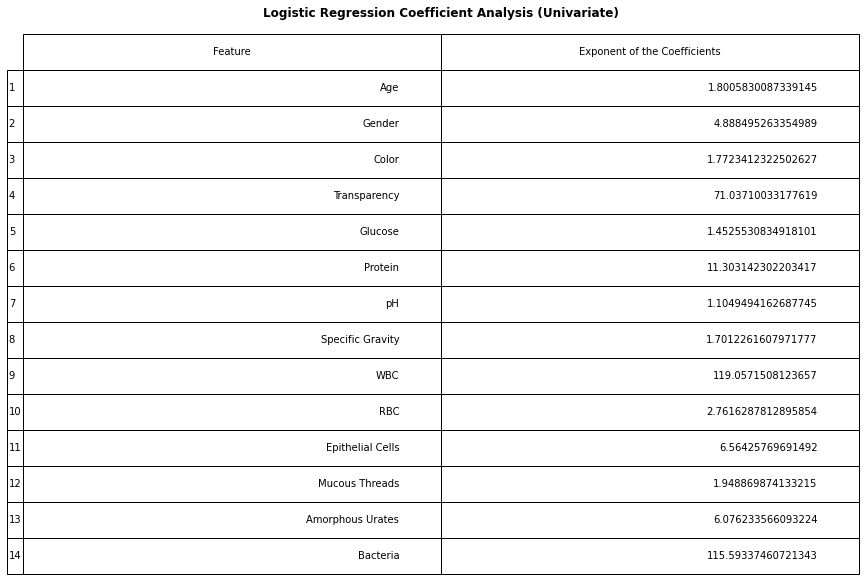

In [7]:

# Create a figure with a specified size
fig = plt.figure(figsize=(15, 0.2))

# Create a table with feature names and exponentiated coefficients
table_data = np.array([df.columns[:-1], np.e**COEFFICIENTS_CONTAINER]).transpose()

# Specify row and column labels for the table
row_labels = [i for i in range(1, len(COEFFICIENTS_CONTAINER) + 1)]
col_labels = ["Feature", "Exponent of the Coefficients"]

# Create the table using plt.table
table = plt.table(cellText=table_data,
                  rowLabels=row_labels,
                  colLabels=col_labels).scale(1, 3)


# Set the title of the plot
plt.title("Logistic Regression Coefficient Analysis (Univariate)", fontweight="bold")

# Turn off axis for a cleaner appearance
plt.axis("off")

# Display the plot
plt.show()

### Bivariate Analysis

<h5>Chi-square test of independence</h5>


$$\text{Null Hypothesis } H_{0} \text{ : There is no association or relationship between the two categorical variables.}$$

$$\text{Alternative Hypothesis } H_{1} \text{ : There is a significant association or relationship between the two categorical variables.}$$



In [8]:
def chisquare_(dataframe: pandas.core.frame.DataFrame, independent_vars: list | tuple | set, dependent_var: str, alpha=0.01) -> None: 
    """
      Using Chi-square independence test to analyze the relationship between the varible/s inside ```independent_vars``` and ```dependent_var``` 
      in ```dataframe```

      Parameters
      ------------
      dataframe : pandas.core.frame.DataFrame
            the dataframe that contains the data for the variables

      independent_vars : list or tuple or set
            the list that contains the independent variables; all the elements inside the list should be present in the dataframe as a columns

      dependent_var : str
            the name of the predictor that will be used to compare to the varible/s inside ```independent_vars```

      Returns
      ------------
      None
    """

    assert all(element in dataframe.columns for element in independent_vars) and dependent_var in dataframe.columns, f"```independent_vars``` and ```dependent_var``` should be a column in the {list(dataframe.columns)}"

    result_container = pd.DataFrame(columns=["variable", "p_value", "degrees_of_freedom", "alpha", "conclusion"])

    fig = plt.figure(figsize = (20, .2))
    ax = fig.add_subplot(111)

    for variable in independent_vars:
        variable_result = {}
        
        contingency_table = pd.crosstab(dataframe[variable], dataframe[dependent_var], margins=True)

        _, p_value, degrees_of_freedom = chi2_contingency(contingency_table)[0:3]

        variable_result["variable"] = variable
        variable_result["p_value"] = p_value
        variable_result["degrees_of_freedom"] = degrees_of_freedom
        variable_result["alpha"] = alpha
        variable_result["conclusion"] = "Reject H0" if p_value <= alpha else "Accept H0"

        result_container = result_container._append(variable_result,
                                                   ignore_index=True)
    
    ax.table(cellText = result_container.values,
             rowLabels = result_container.index,
             colLabels = result_container.columns,
             cellLoc="center").scale(1, 3)
    
    ax.set_title("chi-square analysis by Diagnosis", fontweight="bold")

    ax.axis("off");

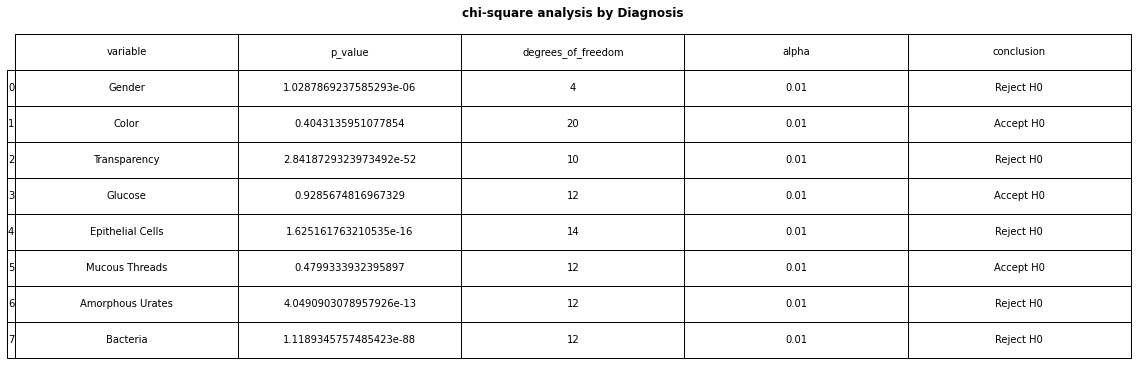

In [9]:

chisquare_(df,
           ["Gender",
            "Color",
            "Transparency", 
            "Glucose",
            "Epithelial Cells", 
            "Mucous Threads",
            "Amorphous Urates",
            "Bacteria"],
            "Diagnosis")

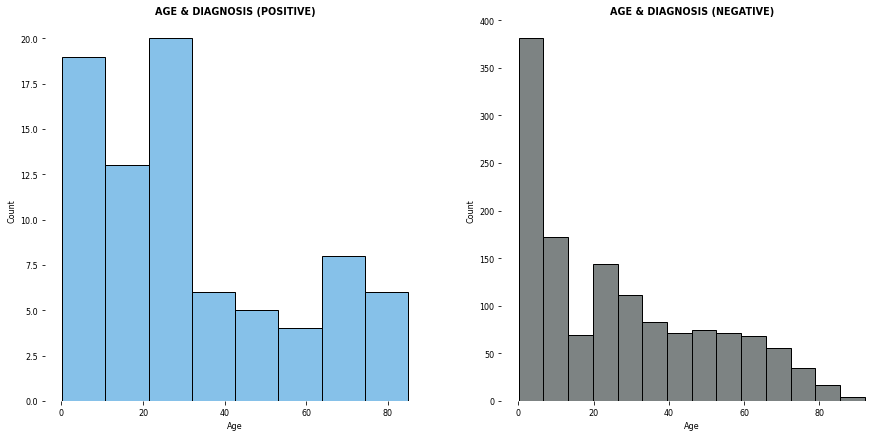

In [10]:

# Set the default font size for Matplotlib
matplotlib.rcParams.update({"font.size": 8})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Define colors and titles for the plots
colors = ["#5DADE2", "#515A5A"]
list_of_titles = ["AGE & DIAGNOSIS (POSITIVE)", "AGE & DIAGNOSIS (NEGATIVE)"]
diagnoses_filter = ["POSITIVE", "NEGATIVE"]

# Iterate over subplots, colors, titles, and diagnosis filters
for ax, clr, title, filter_ in zip(axs, colors, list_of_titles, diagnoses_filter):
    
    # Remove spines for a cleaner appearance
    for spine in ["top", "bottom", "left", "right"]:
        ax.spines[spine].set_visible(False)

    # Plot a histogram using Seaborn for the specified diagnosis filter
    sns.histplot(df[df["Diagnosis"] == filter_], x="Age", ax=ax, color=clr)
    
    # Set the title for the subplot
    ax.set_title(title, fontweight="bold")

# Show the plot
plt.show()

In [11]:
def bivariate_bar_graph(dataframe, x, y, nrows, ncols, y_filter, colors, list_of_titles, invert_yaxis=True, visible_spines=False, sort_results=True):
    """
        Visualize the distribution of categorical variables by counts.

        Parameters
        ------------
        x, y : str
            the name of the x and y variable; these strings should be inside the dataframe.columns

        nrows, ncols : int
            number of rows/columns inside the subplot grid

        y_filter : list or tuple or set
            a list of strings that is used to filter specific data

        colors : list or tuple or set
            a list of strings that is used as color for each subplot
        
        list_of_titles : list or tuple or set
            a list of string that is used as a title for each subplot
        
        invert_yaxis : bool, default=True
            if True, inverts the y axis of all subplots

        visible_spines : bool, default=False
            if True, the spines of all subplots will be visible

        sort_results : bool, default=True
            if True, the data will be sorted according to ```y```

        Returns
        ------------
        None
    """

    assert len(y_filter) == len(colors) and len(y_filter) == len(list_of_titles), "y_filter, colors and list_of_titles must have the same length"

    _, axs = plt.subplots(nrows, ncols, figsize=(16, 6))

    for ax, clr, title, filter_ in zip(axs, colors, list_of_titles, y_filter):

        if not visible_spines:
            for spine in ["top", "bottom", "left", "right"]:
                ax.spines[spine].set_visible(False)

        if sort_results:
            data = dataframe[[x, y]][dataframe[y] == filter_].groupby(by=x).count().sort_values(by = y, ascending=False)
        else:
            data = dataframe[[x, y]][dataframe[y] == filter_].groupby(by=x).count()


        ax.barh(data.index, data[y], ec="k", color=clr)

        if invert_yaxis:
            ax.invert_yaxis()

        ax.set_title(title, fontweight="bold");
        ax.set_xlabel("Counts")

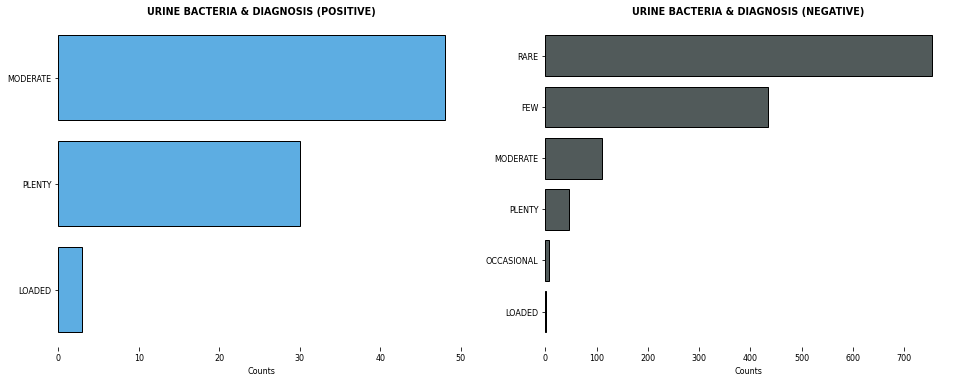

In [12]:
bivariate_bar_graph(df, 
                    x="Bacteria", 
                    y="Diagnosis", 
                    nrows=1, 
                    ncols=2,
                    y_filter=["POSITIVE", "NEGATIVE"], 
                    colors=["#5DADE2", "#515A5A"],
                    list_of_titles=["URINE BACTERIA & DIAGNOSIS (POSITIVE)", "URINE BACTERIA & DIAGNOSIS (NEGATIVE)"])

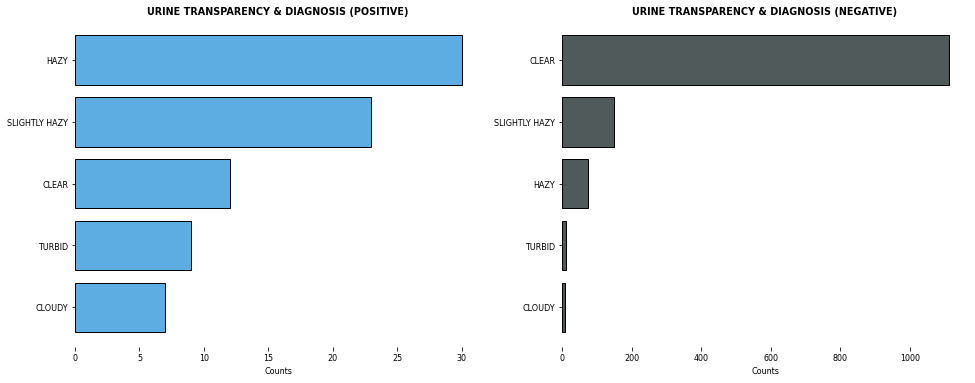

In [13]:
bivariate_bar_graph(df, 
                    x="Transparency", 
                    y="Diagnosis", 
                    nrows=1, 
                    ncols=2,
                    y_filter=["POSITIVE", "NEGATIVE"], 
                    colors=["#5DADE2", "#515A5A"],
                    list_of_titles=["URINE TRANSPARENCY & DIAGNOSIS (POSITIVE)", "URINE TRANSPARENCY & DIAGNOSIS (NEGATIVE)"])

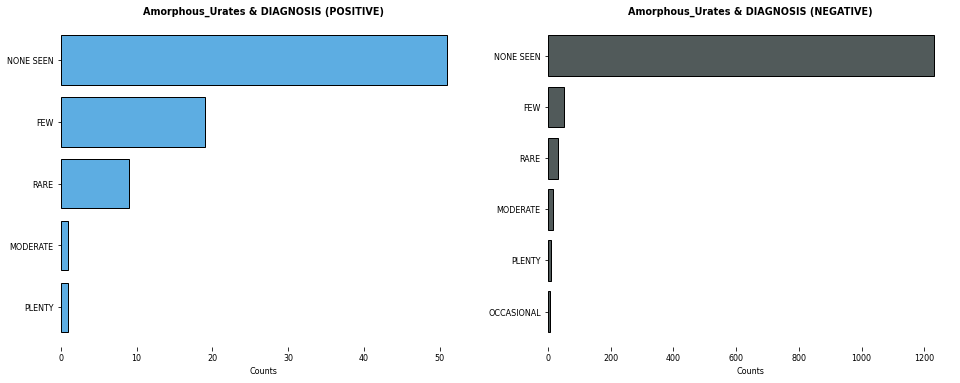

In [14]:
bivariate_bar_graph(df,
                    x="Amorphous Urates",
                    y="Diagnosis",
                    nrows=1,
                    ncols=2,
                    y_filter=["POSITIVE", "NEGATIVE"],
                    colors=["#5DADE2", "#515A5A"],
                    list_of_titles=["Amorphous_Urates & DIAGNOSIS (POSITIVE)", "Amorphous_Urates & DIAGNOSIS (NEGATIVE)"])

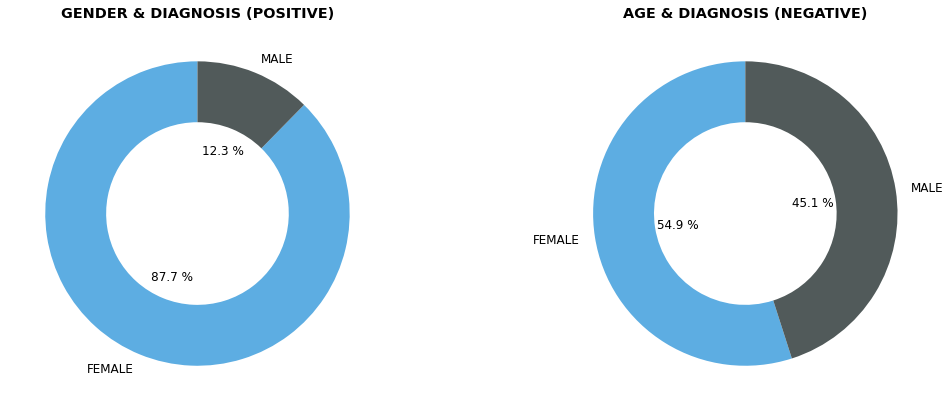

In [15]:
# Set the default font size for Matplotlib
matplotlib.rcParams.update({"font.size": 12})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Define diagnosis categories, titles, and colors
diagnoses_filter = ["POSITIVE", "NEGATIVE"]
list_of_titles = ["GENDER & DIAGNOSIS (POSITIVE)", "AGE & DIAGNOSIS (NEGATIVE)"]
colors = ["#5DADE2", "#515A5A"]

# Iterate over subplots, titles, and diagnosis filters
for ax, title, filter_ in zip(axs, list_of_titles, diagnoses_filter):
    
    # Extract data for the specific diagnosis filter and group by gender
    data = df[["Gender", "Diagnosis"]][df["Diagnosis"] == filter_].groupby(by="Gender").count()
    
    # Plot a pie chart using Matplotlib
    ax.pie(data["Diagnosis"].tolist(), 
           wedgeprops={"width": 0.4, "linewidth": 2}, 
           startangle=90, 
           colors=colors,
           labels=data.index,
           autopct="%.1f %%",
           pctdistance=0.45)

    # Set a title for the subplot
    ax.set_title(title, fontweight="bold")

# Show the plot
plt.show()

### Multivariate Analysis

##### Logistic Regression Coefficient Analysis

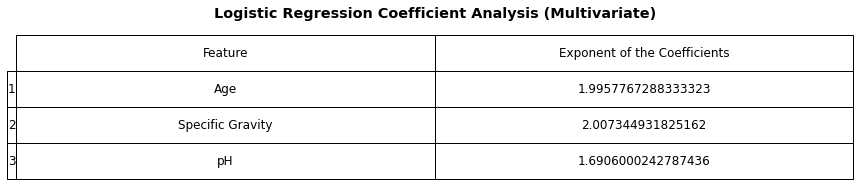

In [16]:
# Initialize logistic regression model
logreg = LogisticRegression()

# Specify the indices for the table
indicies = [1, 2, 3]

# Extract features and target variable
X = df[["Age", "Specific Gravity", "pH"]]
y = df["Diagnosis"].map({"NEGATIVE": 0, "POSITIVE": 1})

# Initialize Min-Max scaler
scaler_ = MinMaxScaler()

# Scale the features
scaled_data = scaler_.fit_transform(X)

# Fit logistic regression model
logreg.fit(scaled_data, y)

# Create a figure with a specified size
fig = plt.figure(figsize=(15, 0.2))

# Create a table with feature names and exponentiated coefficients
table_data = np.array([X.columns, np.e**logreg.coef_.flatten()]).transpose()

# Specify row and column labels for the table
row_labels = indicies
col_labels = ["Feature", "Exponent of the Coefficients"]

# Create the table using plt.table
table = plt.table(cellText=table_data,
                  rowLabels=row_labels,
                  colLabels=col_labels,
                  cellLoc="center").scale(1, 3)

# Set the title of the plot
plt.title("Logistic Regression Coefficient Analysis (Multivariate)", fontweight="bold")

# Turn off axis for a cleaner appearance
plt.axis("off")

# Display the plot
plt.show()